In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score , plot_confusion_matrix ,plot_roc_curve

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from mlxtend.classifier import StackingClassifier


In [8]:
train_data=pd.read_csv('data/train.csv')
test_data=pd.read_csv('data/test.csv')

In [9]:
train_data.shape

(103904, 25)

In [10]:
test_data.shape

(25976, 25)

In [11]:
main_df=pd.concat([train_data, test_data])

In [12]:
main_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [7]:
main_df.shape

(129880, 25)

In [8]:
#drop unneeded columns
main_df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [9]:
main_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [10]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [11]:
# remove white space before and after features name
main_df.columns=[column.strip() for column in main_df.columns]
main_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [12]:
# rename columns to remove - and /
main_df.columns = main_df.columns.str.replace(' ', '_')
main_df.columns = main_df.columns.str.replace('/', '_')
main_df.columns = main_df.columns.str.replace('-', '_')

In [13]:
main_df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
# check null values
main_df.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure_Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

In [15]:
# drop null values 
main_df.dropna(inplace=True)

In [16]:
main_df.shape

(129487, 23)

In [17]:
main_df.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [18]:
# check duplicated rows
main_df.duplicated().sum()

0

In [19]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer_Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type_of_Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight_Distance                    129487 non-null  int64  
 6   Inflight_wifi_service              129487 non-null  int64  
 7   Departure_Arrival_time_convenient  129487 non-null  int64  
 8   Ease_of_Online_booking             129487 non-null  int64  
 9   Gate_location                      129487 non-null  int64  
 10  Food_and_drink                     129487 non-null  int64  
 11  Online_boarding                    12948

In [20]:
main_df['satisfaction'].value_counts()

neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction, dtype: int64

In [21]:
main_df.sample(20)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
21841,Male,Loyal Customer,26,Business travel,Business,2454,1,4,4,4,...,1,1,1,2,1,3,1,0,0.0,neutral or dissatisfied
67994,Male,Loyal Customer,30,Business travel,Eco Plus,834,3,1,1,1,...,3,3,4,4,1,4,3,0,0.0,neutral or dissatisfied
20602,Female,Loyal Customer,45,Business travel,Business,3502,5,5,4,5,...,4,4,5,4,4,4,3,93,87.0,satisfied
21408,Female,Loyal Customer,26,Personal Travel,Eco,547,2,3,2,4,...,1,2,5,4,2,3,1,0,0.0,neutral or dissatisfied
98091,Female,Loyal Customer,40,Personal Travel,Eco,316,3,3,1,2,...,5,1,5,2,3,3,5,1,7.0,neutral or dissatisfied
57584,Male,Loyal Customer,38,Business travel,Eco,67,4,5,5,5,...,4,3,5,4,2,2,4,0,0.0,satisfied
10526,Male,disloyal Customer,24,Business travel,Business,1222,5,0,5,2,...,3,4,2,4,5,5,3,6,13.0,satisfied
57298,Male,Loyal Customer,66,Personal Travel,Eco Plus,722,2,2,2,3,...,4,3,1,4,3,3,4,1,0.0,neutral or dissatisfied
67739,Female,Loyal Customer,32,Business travel,Eco,1562,5,5,5,5,...,5,4,2,1,1,3,5,24,15.0,satisfied
6151,Male,Loyal Customer,41,Business travel,Business,1045,3,3,3,3,...,5,5,5,5,4,5,3,61,65.0,satisfied


In [22]:
# remove 0 score, which that mean no answering question
Keep_answered = ((main_df.Departure_Arrival_time_convenient  != 0) &(main_df.Inflight_wifi_service  != 0)
                     & (main_df.Ease_of_Online_booking  != 0) &(main_df.Gate_location  != 0) &(main_df.Food_and_drink  != 0)
                     & (main_df.Online_boarding  != 0) & (main_df.Leg_room_service  != 0) & (main_df.Checkin_service  != 0)
                     & (main_df.Inflight_service  != 0) & (main_df.Cleanliness  != 0) & (main_df.Baggage_handling  != 0)
                 # and drop the 0 value of flight distance
                     & (main_df.Flight_Distance  != 0))

main_df = main_df[Keep_answered]


In [23]:
main_df['Departure_Delay_in_Minutes']= main_df['Departure_Delay_in_Minutes'].astype(float)
main_df.dtypes

<ipython-input-23-359b66163e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['Departure_Delay_in_Minutes']= main_df['Departure_Delay_in_Minutes'].astype(float)


Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure_Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On_board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes           float64
Arrival_Delay_in_Minutes             float64
satisfacti

In [24]:
main_df.shape

(119204, 23)

In [25]:
main_df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0.0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0.0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0.0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0.0,0.0,satisfied


In [26]:
main_df.sample(5)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
15555,Female,disloyal Customer,39,Business travel,Business,954,3,2,2,4,...,2,2,2,3,2,3,2,0.0,0.0,neutral or dissatisfied
101924,Female,Loyal Customer,28,Business travel,Business,479,1,1,1,1,...,4,5,4,5,5,4,4,5.0,0.0,satisfied
37846,Male,Loyal Customer,32,Personal Travel,Eco,598,2,3,2,4,...,2,1,4,2,1,3,2,0.0,2.0,neutral or dissatisfied
86666,Female,Loyal Customer,39,Business travel,Business,598,4,4,4,4,...,4,4,4,4,3,4,1,0.0,2.0,neutral or dissatisfied
39424,Male,Loyal Customer,30,Business travel,Eco Plus,680,4,3,3,3,...,4,4,2,4,1,4,4,0.0,0.0,neutral or dissatisfied


In [27]:
main_df['satisfaction'].value_counts()

neutral or dissatisfied    68330
satisfied                  50874
Name: satisfaction, dtype: int64

In [28]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119204 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             119204 non-null  object 
 1   Customer_Type                      119204 non-null  object 
 2   Age                                119204 non-null  int64  
 3   Type_of_Travel                     119204 non-null  object 
 4   Class                              119204 non-null  object 
 5   Flight_Distance                    119204 non-null  int64  
 6   Inflight_wifi_service              119204 non-null  int64  
 7   Departure_Arrival_time_convenient  119204 non-null  int64  
 8   Ease_of_Online_booking             119204 non-null  int64  
 9   Gate_location                      119204 non-null  int64  
 10  Food_and_drink                     119204 non-null  int64  
 11  Online_boarding                    11920

## Removing the Outliers 

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flight_Distance'>

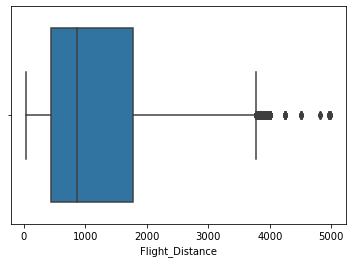

In [29]:
sns.boxplot(main_df.Flight_Distance)

In [30]:
# outliers
q3= main_df.Flight_Distance.quantile(q=0.75)
q1= main_df.Flight_Distance.quantile(q=0.25)
Iqr = q3 - q1 
upper = (q3 + 1.5 * Iqr)  
lower= (q1 - 1.5 * Iqr)



In [31]:
main_df = main_df[main_df['Flight_Distance'] < upper]
main_df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0.0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0.0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0.0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0.0,0.0,satisfied


/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flight_Distance'>

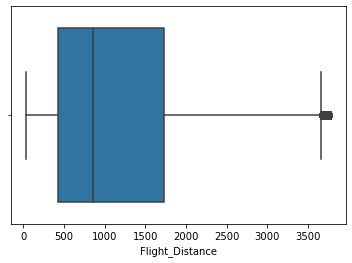

In [32]:
sns.boxplot(main_df.Flight_Distance)

In [33]:
main_df.shape

(116885, 23)

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

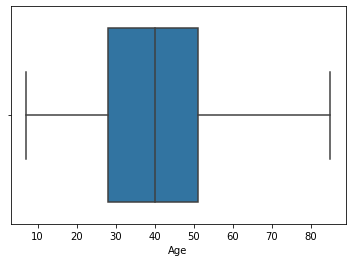

In [34]:
sns.boxplot(main_df.Age)

In [35]:
q3= main_df.Age.quantile(q=0.75)
q1= main_df.Age.quantile(q=0.25)
Iqr = q3 - q1 
upper = (q3 + 1.5 * Iqr) 
lower = (q1 - 1.5 * Iqr) 
print(lower)
print(upper)

-6.5
85.5


In [36]:
main_df = main_df[main_df['Age'] < upper]
main_df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0.0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0.0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0.0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0.0,0.0,satisfied


/Users/eman./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

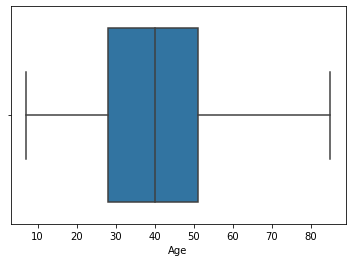

In [37]:
sns.boxplot(main_df.Age)

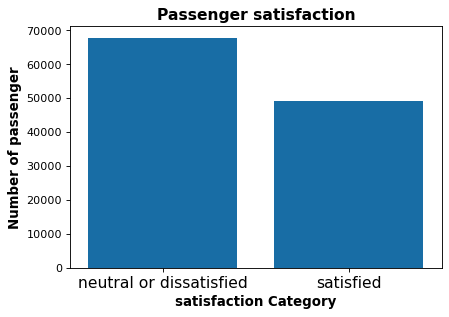

In [38]:
plt.figure(figsize=(6, 4), dpi=80)
sns.countplot(x=main_df['satisfaction'],data=main_df, color='#0072BD')
plt.title("Passenger satisfaction", fontsize=14, fontweight='bold')
plt.ylabel("Number of passenger", fontsize=12, fontweight='bold')
plt.xlabel("satisfaction Category", fontsize=12, fontweight='bold')
plt.xticks(size=14)

plt.savefig('balane_data.png',dpi=100, bbox_inches='tight')

Text(0.5, 1.0, 'Age')

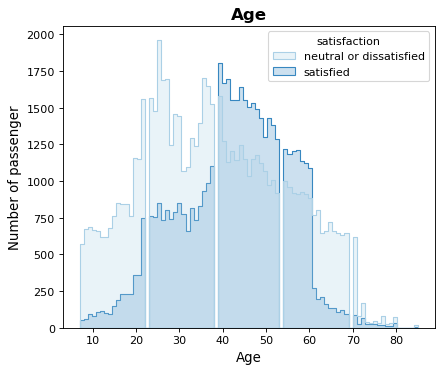

In [39]:
plt.figure(figsize=(6, 5), dpi=80)

Age= sns.histplot(main_df, x="Age", hue="satisfaction", palette="Blues", element="step")

Age.set_xlabel('Age', size= 12) 
Age.set_ylabel('Number of passenger', size= 12)
Age.set_title('Age', weight = 'bold', size =15)
#plt.savefig('Age.png',dpi=100, bbox_inches='tight')

Text(0.5, 1.0, 'Gender vs No. Passenger')

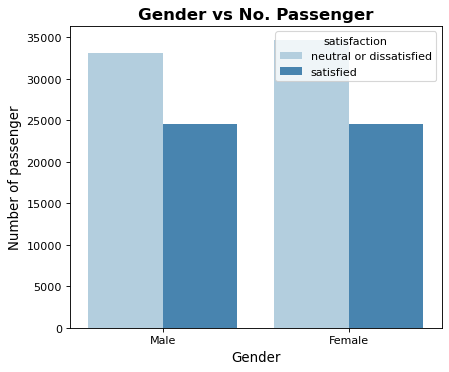

In [40]:
plt.figure(figsize=(6, 5), dpi=80)

Gender_col = sns.countplot(x="Gender", hue = 'satisfaction', data=main_df, palette="Blues")

Gender_col.set_ylabel('Number of passenger', size= 12) 
Gender_col.set_xlabel('Gender', size= 12)
Gender_col.set_title('Gender vs No. Passenger', weight = 'bold', size =15)
#plt.savefig('Gender.png',dpi=100, bbox_inches='tight')

Text(0.5, 1.0, 'Travel Type vs No.Passenger')

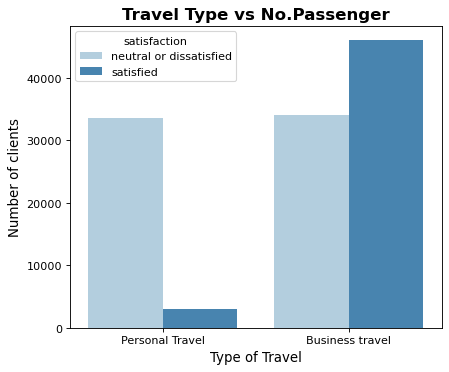

In [41]:
plt.figure(figsize=(6, 5), dpi=80)

Gender_col = sns.countplot(x="Type_of_Travel", hue = 'satisfaction', data=main_df, palette="Blues")
Gender_col.set_ylabel('Number of clients', size= 12) 
Gender_col.set_xlabel('Type of Travel', size= 12)
Gender_col.set_title('Travel Type vs No.Passenger', weight = 'bold', size =15)
#plt.savefig('travel_type.png',dpi=100, bbox_inches='tight')

Text(0.5, 1.0, 'Class type vs No. Passenger ')

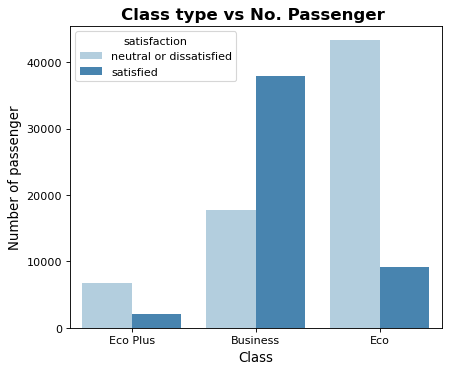

In [42]:
plt.figure(figsize=(6, 5), dpi=80)

Gender_col = sns.countplot(x="Class", hue = 'satisfaction', data=main_df, palette="Blues")

Gender_col.set_ylabel('Number of passenger', size= 12) 
Gender_col.set_xlabel('Class', size= 12)
Gender_col.set_title('Class type vs No. Passenger ', weight = 'bold', size =15)
#plt.savefig('class_type.png',dpi=100, bbox_inches='tight')

Text(0.5, 1.0, 'Clients Type vs No.Passnger')

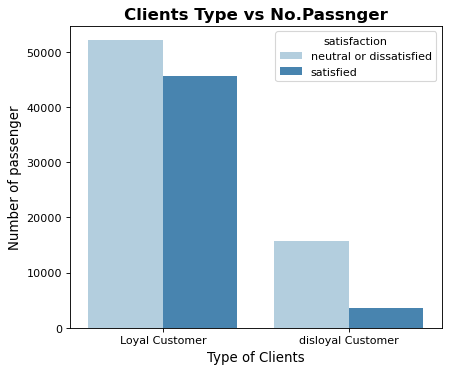

In [43]:

plt.figure(figsize=(6, 5), dpi=80)

Gender_col = sns.countplot(x="Customer_Type", hue = 'satisfaction', data=main_df, palette="Blues")

Gender_col.set_ylabel('Number of passenger', size= 12) 
Gender_col.set_xlabel('Type of Clients', size= 12)
Gender_col.set_title('Clients Type vs No.Passnger', weight = 'bold', size =15)

In [44]:
main_df.shape

(116885, 23)

In [45]:
main_df.head(4)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied


In [46]:
for i in range(116885):
    
    if main_df['Departure_Delay_in_Minutes'].iloc[i]==0 :
        main_df['Departure_Delay_in_Minutes'].iloc[i]='on_time'
    elif main_df['Departure_Delay_in_Minutes'].iloc[i]<=15 :
        main_df['Departure_Delay_in_Minutes'].iloc[i]='delay_up_to_15'
    elif main_df['Departure_Delay_in_Minutes'].iloc[i]<=30 :
        main_df['Departure_Delay_in_Minutes'].iloc[i]='delay_up_to_30'
    else :
        main_df['Departure_Delay_in_Minutes'].iloc[i]='delay_more_than_30'

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [47]:
for i in range(116885):
    
    if main_df['Arrival_Delay_in_Minutes'].iloc[i]==0 :
        main_df['Arrival_Delay_in_Minutes'].iloc[i]='on_time'
    elif main_df['Arrival_Delay_in_Minutes'].iloc[i]<=15 :
        main_df['Arrival_Delay_in_Minutes'].iloc[i]='delay_up_to_15'
    elif main_df['Arrival_Delay_in_Minutes'].iloc[i]<=30 :
        main_df['Arrival_Delay_in_Minutes'].iloc[i]='delay_up_to_30'
    else :
        main_df['Arrival_Delay_in_Minutes'].iloc[i]='delay_more_than_30'

In [13]:
main_df.to_csv("cleaning_data.csv")

In [2]:
main_df = pd.read_csv("data_cleaning.csv")
main_df.head(7)

,Unnamed: 0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,delay_up_to_30,delay_up_to_30,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,delay_up_to_15,delay_up_to_15,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,on_time,on_time,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,delay_up_to_15,delay_up_to_15,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,on_time,on_time,satisfied
5,5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,on_time,on_time,neutral or dissatisfied
6,6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,delay_up_to_15,delay_up_to_30,neutral or dissatisfied


In [3]:
main_df.drop(['Unnamed: 0'],axis=1,inplace=True)
main_df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,delay_up_to_30,delay_up_to_30,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,delay_up_to_15,delay_up_to_15,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,on_time,on_time,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,delay_up_to_15,delay_up_to_15,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,on_time,on_time,satisfied


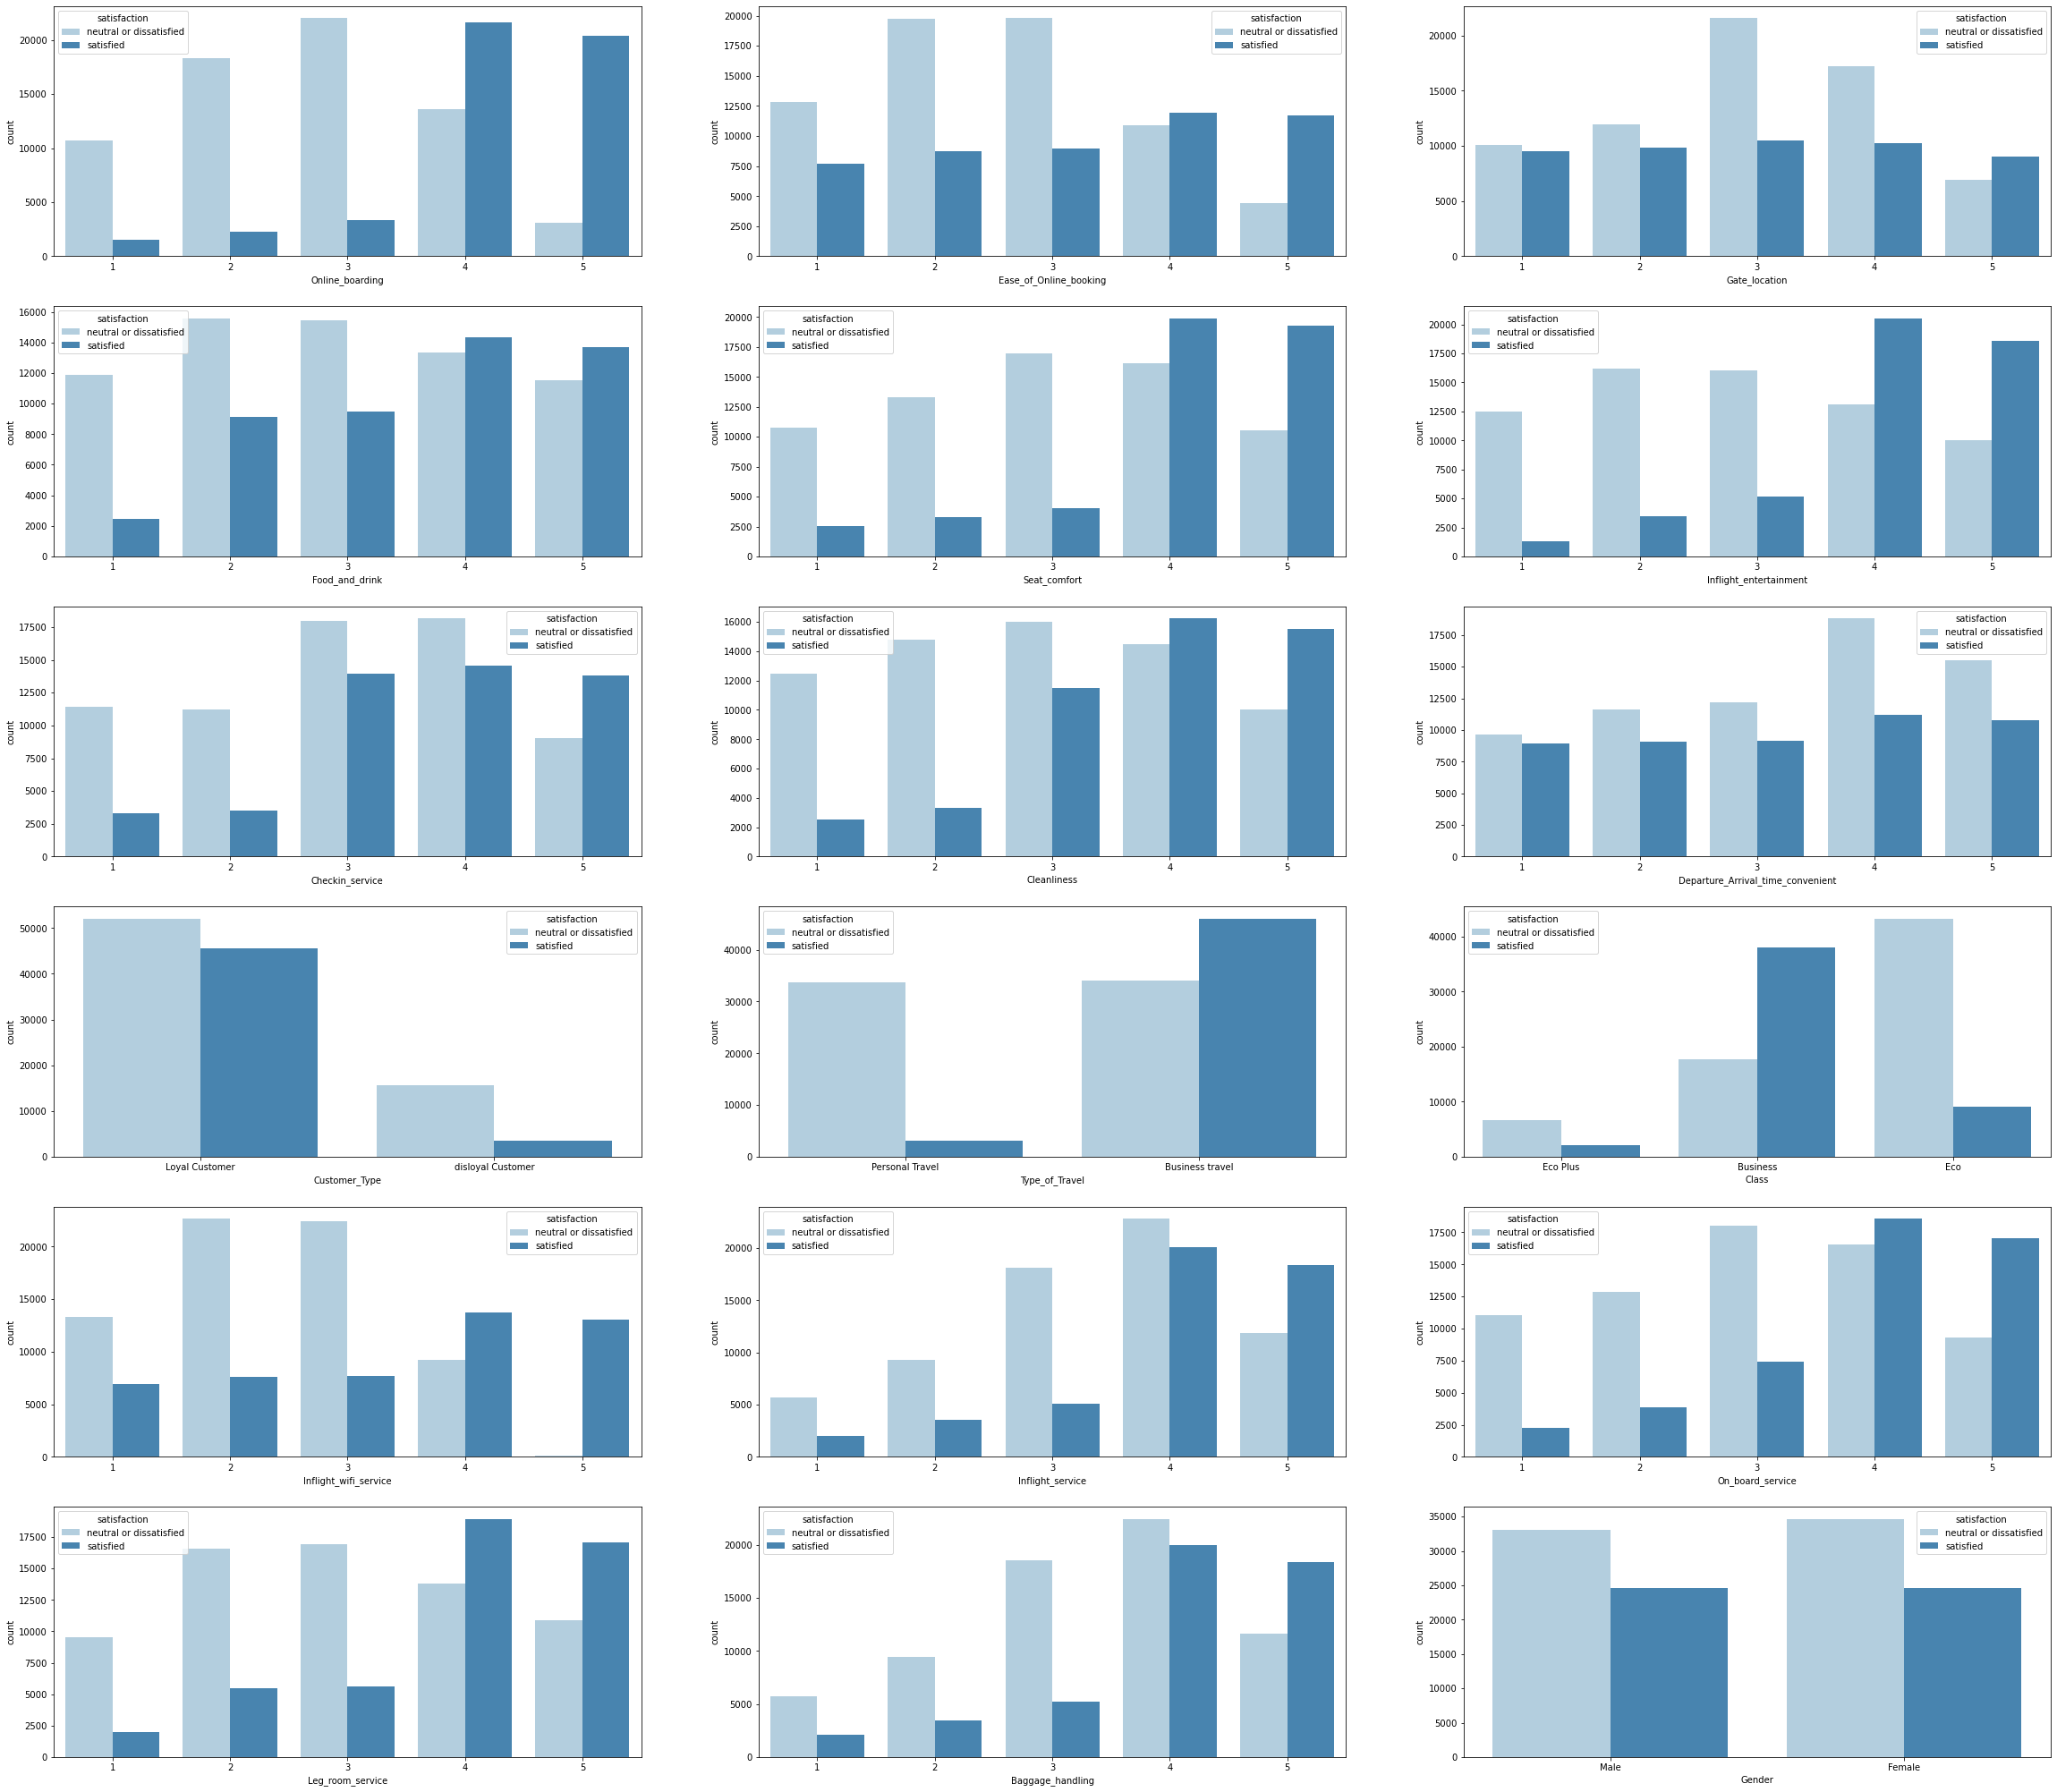

In [4]:
plt.figure(figsize=(40,36))
plt.suptitle("")
plt.subplot(6,3,1)
sns.countplot(x='Online_boarding',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,2)
sns.countplot(x='Ease_of_Online_booking',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,3)
sns.countplot(x='Gate_location',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,4)
sns.countplot(x='Food_and_drink',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,5)
sns.countplot(x='Seat_comfort',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,6)
sns.countplot(x='Inflight_entertainment',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,7)
sns.countplot(x='Checkin_service',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,8)
sns.countplot(x='Cleanliness',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,9)
sns.countplot(x='Departure_Arrival_time_convenient',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,10)
sns.countplot(x='Customer_Type',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,11)
sns.countplot(x='Type_of_Travel',hue="satisfaction",data=main_df, palette='Blues')

plt.subplot(6,3,12)
sns.countplot(x='Class',hue="satisfaction",data=main_df, palette='Blues')


plt.subplot(6,3,13)
sns.countplot(x='Inflight_wifi_service',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,14)
sns.countplot(x='Inflight_service',hue="satisfaction",data=main_df, palette='Blues')

plt.subplot(6,3,15)
sns.countplot(x='On_board_service',hue="satisfaction",data=main_df, palette='Blues')
plt.subplot(6,3,16)
sns.countplot(x='Leg_room_service',hue="satisfaction",data=main_df, palette='Blues')

plt.subplot(6,3,17)
sns.countplot(x='Baggage_handling',hue="satisfaction",data=main_df, palette='Blues')

plt.subplot(6,3,18)
sns.countplot(x='Gender',hue="satisfaction",data=main_df, palette='Blues')

plt.savefig('count_plot.png',dpi=100, bbox_inches='tight')


## Convert categorical data to dummies varibles.

In [5]:
main_df=pd.get_dummies(main_df, drop_first=True)

In [6]:
main_df

,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Type_of_Travel_Personal Travel,Class_Eco,Class_Eco Plus,Departure_Delay_in_Minutes_delay_up_to_15,Departure_Delay_in_Minutes_delay_up_to_30,Departure_Delay_in_Minutes_on_time,Arrival_Delay_in_Minutes_delay_up_to_15,Arrival_Delay_in_Minutes_delay_up_to_30,Arrival_Delay_in_Minutes_on_time,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,1,0,1,0,1,0,0,1,0,0
1,25,235,3,2,3,3,1,3,1,1,...,0,0,0,1,0,0,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,0,0,0,0,0,1,0,0,1,1
3,25,562,2,5,5,5,2,2,2,2,...,0,0,0,1,0,0,1,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116880,34,526,3,3,3,1,4,3,4,4,...,0,0,0,0,0,1,0,0,1,0
116881,23,646,4,4,4,4,4,4,4,4,...,0,0,0,0,0,1,0,0,1,1
116882,17,828,2,5,1,5,2,1,2,2,...,1,1,0,0,0,1,0,0,1,0
116883,14,1127,3,3,3,3,4,4,4,4,...,0,0,0,0,0,1,0,0,1,1


In [7]:
main_df.shape

(116885, 28)

In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116885 entries, 0 to 116884
Data columns (total 28 columns):
 #   Column                                     Non-Null Count   Dtype
---  ------                                     --------------   -----
 0   Age                                        116885 non-null  int64
 1   Flight_Distance                            116885 non-null  int64
 2   Inflight_wifi_service                      116885 non-null  int64
 3   Departure_Arrival_time_convenient          116885 non-null  int64
 4   Ease_of_Online_booking                     116885 non-null  int64
 5   Gate_location                              116885 non-null  int64
 6   Food_and_drink                             116885 non-null  int64
 7   Online_boarding                            116885 non-null  int64
 8   Seat_comfort                               116885 non-null  int64
 9   Inflight_entertainment                     116885 non-null  int64
 10  On_board_service                

In [9]:
main_df.columns

Index(['Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Gender_Male', 'Customer_Type_disloyal Customer',
       'Type_of_Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus',
       'Departure_Delay_in_Minutes_delay_up_to_15',
       'Departure_Delay_in_Minutes_delay_up_to_30',
       'Departure_Delay_in_Minutes_on_time',
       'Arrival_Delay_in_Minutes_delay_up_to_15',
       'Arrival_Delay_in_Minutes_delay_up_to_30',
       'Arrival_Delay_in_Minutes_on_time', 'satisfaction_satisfied'],
      dtype='object')

## Splitting and Scaling the data

In [10]:
X= main_df.drop(['satisfaction_satisfied',"Gender_Male","Departure_Arrival_time_convenient"], axis=1)
y= main_df['satisfaction_satisfied']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=.052631, random_state=3)

In [11]:
y_test.shape

(5845,)

In [12]:
y_val.shape

(5845,)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

**Take 10,000 rows as a sample of data** to use it in grid search 

In [14]:
sub_main=main_df.sample(10000)
X1= sub_main.drop('satisfaction_satisfied', axis=1)
subset_y_train= sub_main['satisfaction_satisfied']
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X1)

In [15]:
X1.shape

(10000, 27)

In [16]:
subset_y_train.shape

(10000,)

In [17]:
X_train_scaled1.shape

(10000, 27)

## Experminting with different models:


## 1- KNN Model

In [18]:

k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [19]:
knn =KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled1, subset_y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 14, 'weights': 'distance'}
Best estimator:  KNeighborsClassifier(n_neighbors=14, weights='distance')
Best score:  0.9113


In [20]:
knn = KNeighborsClassifier(n_neighbors=14, weights='distance')
knn.fit(X_train_scaled, y_train)
print("The score for kNN is")
print("Training set: {:6.2f}%".format(100*knn.score(X_train_scaled, y_train)))
print("validation set: {:6.2f}%".format(100*knn.score(X_val_scaled, y_val)))
print("kNN confusion matrix: \n\n", confusion_matrix(y_val, knn.predict(X_val_scaled)))


The score for kNN is
Training set: 100.00%
validation set:  92.93%
kNN confusion matrix: 

 [[3220  122]
 [ 291 2212]]


## 2- Logistic Regression Model

In [21]:
dt_range = list(range(1, 100))
param_grid = dict(C=dt_range)
print(param_grid)

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [22]:
log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled1, subset_y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'C': 1}
Best estimator:  LogisticRegression(C=1)
Best score:  0.8977999999999999


In [34]:
log_reg = LogisticRegression( C=1 )
log_reg.fit(X_train_scaled, y_train)
print("The score for logistic regression")
print("Training set is : {:6.2f}%".format(100*log_reg.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*log_reg.score(X_val_scaled, y_val)))
print("logistic regression confusion matrix: \n\n", confusion_matrix(y_val, log_reg.predict(X_val_scaled)))


The score for logistic regression
Training set is :  89.99%
validation set is:  89.07%
logistic regression confusion matrix: 

 [[3025  317]
 [ 322 2181]]


In [24]:
log_reg.predict_proba(X_val_scaled[:5,])

array([[0.99885659, 0.00114341],
       [0.01609964, 0.98390036],
       [0.02386837, 0.97613163],
       [0.00377405, 0.99622595],
       [0.53717595, 0.46282405]])

In [25]:
log_reg.intercept_, log_reg.coef_ 

(array([-1.0661497]),
 array([[-0.05043711,  0.0268051 ,  0.93767456,  0.32516716, -0.49169013,
         -0.07894046,  1.16505677,  0.02307423,  0.16342368,  0.44362001,
          0.42575732,  0.162092  ,  0.43224539,  0.16444786,  0.31707146,
         -1.06464229, -1.67629068, -0.39825379, -0.29042807, -0.00553158,
         -0.02571155,  0.01406599,  0.12206404,  0.00353216,  0.34607474]]))

## 3- Decision Tree Model

In [26]:
dt_range = list(range(1, 31))
param_grid = dict(max_depth=dt_range)
print(param_grid)


{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [27]:
decisiontree = DecisionTreeClassifier()
grid = GridSearchCV(decisiontree, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled1, subset_y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)


Best params:  {'max_depth': 11}
Best estimator:  DecisionTreeClassifier(max_depth=11)
Best score:  0.9253


In [36]:
decisiontree = DecisionTreeClassifier(max_depth=11)
decisiontree.fit(X_train_scaled, y_train)
print("The score for decision tree ")
print("Training set is : {:6.2f}%".format(100*decisiontree.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*decisiontree.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, decisiontree.predict(X_val_scaled)))


The score for decision tree 
Training set is :  95.46%
validation set is:  94.54%
decision tree confusion matrix: 

 [[3243   99]
 [ 220 2283]]


## 4- Random Forest Model

- **Grid Search**

In [29]:
rd_range = list(range(1, 200, 10))
param_grid = dict(n_estimators=rd_range)
print(param_grid)


{'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191]}


In [30]:
randomforest = RandomForestClassifier()
grid = GridSearchCV(randomforest, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_estimators': 171}
Best estimator:  RandomForestClassifier(n_estimators=171)
Best score:  0.9617852559532297


In [37]:
randomforest = RandomForestClassifier(n_estimators=171)
randomforest.fit(X_train_scaled, y_train)
print("The score for random forest ")
print("Training set is : {:6.2f}%".format(100*randomforest.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*randomforest.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, randomforest.predict(X_val_scaled)))


The score for random forest 
Training set is : 100.00%
validation set is:  95.83%
decision tree confusion matrix: 

 [[3280   62]
 [ 182 2321]]


## Feature Engneering

- **RF (Polynomial degree 2)**

In [38]:
from sklearn.preprocessing import  PolynomialFeatures

rf_poly2 = RandomForestClassifier(n_estimators=171)
poly2 = PolynomialFeatures(degree=2) 
X_train_poly = poly2.fit_transform(X_train)
X_val_poly = poly2.transform(X_val)
rf_poly2.fit(X_train_poly, y_train)

print("The score for random forest ploy 2 ")
print("Training set is : {:6.2f}%".format(100*rf_poly2.score(X_train_poly, y_train)))
print("validation set is: {:6.2f}%".format(100*rf_poly2.score(X_val_poly, y_val)))


The score for random forest ploy 2 
Training set is : 100.00%
validation set is:  96.10%


- **RF (Polynomial degree 3)**

In [39]:
rf_poly3 = RandomForestClassifier(n_estimators=171)
poly3 = PolynomialFeatures(degree=3) 
X_train_poly = poly3.fit_transform(X_train)
X_val_poly = poly3.transform(X_val)
rf_poly3.fit(X_train_poly, y_train)

print("The score for random forest ploy 3 ")
print("Training set is : {:6.2f}%".format(100*rf_poly3.score(X_train_poly, y_train)))
print("validation set is: {:6.2f}%".format(100*rf_poly3.score(X_val_poly, y_val)))


The score for random forest ploy 3 
Training set is : 100.00%
validation set is:  95.91%


## 5- XGBClassifier


In [40]:
gbm = xgb.XGBClassifier( 
                        n_estimators=900,
                        max_depth=9,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8
    
                       )


In [41]:
gbm.fit(X_train_scaled, y_train)
print("The score for XGB classifier")
print("Training set is : {:6.2f}%".format(100*gbm.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*gbm.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, gbm.predict(X_val_scaled)))


[11:40:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/eman./opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The score for XGB classifier
Training set is :  99.95%
validation set is:  95.83%
decision tree confusion matrix: 

 [[3258   84]
 [ 160 2343]]


- **XGBClassifier (Polynominal with degree 2)**

In [42]:
gbm_poly2 = xgb.XGBClassifier( 
                        n_estimators=900,
                        max_depth=9,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8
                       )

poly22 = PolynomialFeatures(degree=2) 
X_train_poly = poly22.fit_transform(X_train)
X_val_poly = poly22.transform(X_val)
gbm_poly2.fit(X_train_poly, y_train)

print("The score for XGB ploy 2")
print("Training set is : {:6.2f}%".format(100*gbm_poly2.score(X_train_poly, y_train)))
print("validation set is: {:6.2f}%".format(100*gbm_poly2.score(X_val_poly, y_val)))


/Users/eman./opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:41:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The score for XGB ploy 2
Training set is : 100.00%
validation set is:  95.91%


- **XGBClassifier (Polynominal with degree 3)**

In [43]:
gbm_poly3 = xgb.XGBClassifier( 
                        n_estimators=900,
                        max_depth=9,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8
    
                       )

poly33 = PolynomialFeatures(degree=3) 
X_train_poly = poly33.fit_transform(X_train)
X_val_poly = poly33.transform(X_val)
gbm_poly3.fit(X_train_poly, y_train)

print("The score for XGB ploy 3")
print("Training set is : {:6.2f}%".format(100*gbm_poly3.score(X_train_poly, y_train)))
print("validation set is: {:6.2f}%".format(100*gbm_poly3.score(X_val_poly, y_val)))


/Users/eman./opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The score for XGB ploy 3
Training set is : 100.00%
validation set is:  95.89%


## 6- Gradient Boosting Model

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier( 
                        n_estimators=900,
                        max_depth=9,
                        learning_rate=.05, 
                        subsample=.8,
                       )

In [45]:
gb_clf.fit(X_train_scaled, y_train)
print("The score for GB model ")
print("Training set is : {:6.2f}%".format(100*gb_clf.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*gb_clf.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, gb_clf.predict(X_val_scaled)))

The score for GB model 
Training set is : 100.00%
validation set is:  95.81%
decision tree confusion matrix: 

 [[3260   82]
 [ 163 2340]]


## 7- Naive Bayes Model

In [46]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
print("The score for NB model ")
print("Training set is : {:6.2f}%".format(100*nb.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*nb.score(X_val_scaled, y_val)))
print("NB confusion matrix: \n\n", confusion_matrix(y_val, nb.predict(X_val_scaled)))

The score for NB model 
Training set is :  88.24%
validation set is:  86.91%
NB confusion matrix: 

 [[3049  293]
 [ 472 2031]]


## 8- SVM Model

In [47]:
svc= svm.SVC(kernel='rbf')
svc.fit(X_train_scaled, y_train)
print("The score for SVM model ")
print("Training set is : {:6.2f}%".format(100*svc.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*svc.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, svc.predict(X_val_scaled)))

The score for SVM model 
Training set is :  95.79%
validation set is:  94.94%
decision tree confusion matrix: 

 [[3233  109]
 [ 187 2316]]


## Ensemble Methods 

In [48]:
import pickle

# Load pre-trained/tuned models



models = ["rf_poly2", "rf_poly3","gbm_poly2", "gbm_poly3"]
model_vars = [eval(n) for n in models]
model_list = list(zip(models, model_vars))

In [49]:
for model_name in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_train_scaled, y_train)
    
    with open(f"models/{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)


/Users/eman./opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:08:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
for model_name in models:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_val_scaled, y_val)}')

rf_poly2 score: 0.9579127459366981
rf_poly3 score: 0.9596236099230111
gbm_poly2 score: 0.9582549187339606
gbm_poly3 score: 0.9582549187339606


- #### Max Voting

In [51]:
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard',
                                    n_jobs=-1) 
voting_classifer.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf_poly2',
                              RandomForestClassifier(n_estimators=171)),
                             ('rf_poly3',
                              RandomForestClassifier(n_estimators=171)),
                             ('gbm_poly2',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.8, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.05,
                                            max_del...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                        

In [52]:
y_pred = voting_classifer.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.9584260051325919

## Stacking Classifier

In [53]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [54]:
stacked.fit(X_train_scaled , y_train)

/Users/eman./opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:12:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(classifiers=[RandomForestClassifier(n_estimators=171),
                                RandomForestClassifier(n_estimators=171),
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.8, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.05,
                                              max_delta_step=0, max_depth=9,
                                              min_child_weig...
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                             

In [55]:
y_pred = stacked.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.9589392643284859

# Testing on selected model

- ### Based on the score metric, Random forest classifier is the best models and we will do model testing on it.

In [56]:
X_data = pd.concat([X_train, X_val])
y_data = pd.concat([y_train, y_val])


In [57]:
rf = RandomForestClassifier(n_estimators=169)
poly = PolynomialFeatures(degree=2) 

X_poly = poly.fit_transform(X_data)
rf.fit(X_poly,y_data)
X_test_poly = poly.transform(X_test)
y_pred = rf.predict(X_test_poly)


print("The score for random forest ploy 2 ")
print("Training set is : {:6.2f}%".format(100*rf.score(X_poly, y_data)))
print("Testing set is : {:6.2f}%".format(100*accuracy_score(y_test, y_pred)))
print("confusion matrix: \n\n",confusion_matrix(y_test, y_pred))

The score for random forest ploy 2 
Training set is : 100.00%
Testing set is :  95.93%
confusion matrix: 

 [[3283   73]
 [ 165 2324]]


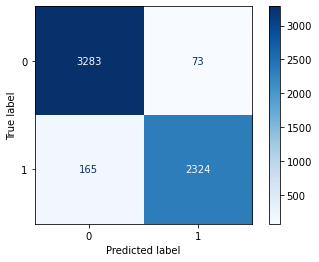

In [58]:
plot_confusion_matrix(rf, X_test_poly, y_test, cmap=plt.cm.Blues)  
plt.show()

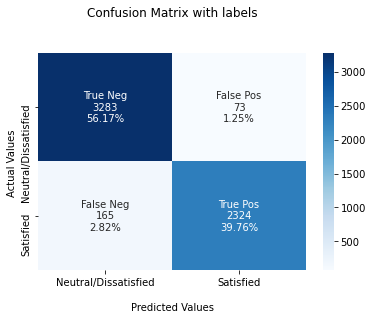

<Figure size 432x288 with 0 Axes>

In [59]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Neutral/Dissatisfied','Satisfied'])
ax.yaxis.set_ticklabels(['Neutral/Dissatisfied','Satisfied'])

## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig('Confusion_Matrix.png',dpi=100, bbox_inches='tight')

In [60]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3356
           1       0.97      0.93      0.95      2489

    accuracy                           0.96      5845
   macro avg       0.96      0.96      0.96      5845
weighted avg       0.96      0.96      0.96      5845



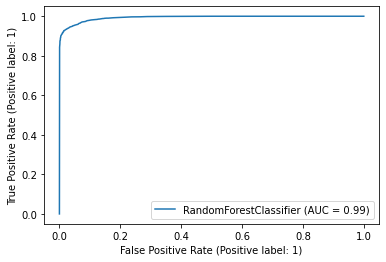

In [61]:
plot_roc_curve(rf, X_test_poly, y_test)

plt.savefig('RF_roc.png',dpi=100, bbox_inches='tight')

## Saving Our model

In [62]:
with open(f"models/rf.pickle", "wb") as pfile:
    pickle.dump(rf, pfile)